# Geometrical log-spiral plastic slip lines around the circular opening
Note that the code used for isotropic loading configuration, assuming diffused and spread nine-point geometry shape.
Also that the line generation stopped using parameters controlled in t_vals (0.28 represents the code to stop at second intersection with the mirrorred one)

changeable parameters are r, phi_deg, stop_point.
other than that are the rotation angles (that defined how many diffused and spread n-point geometry shape)

## Triaxial compression (TC)

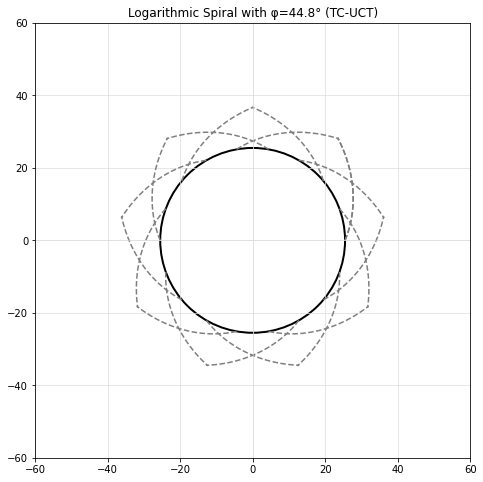

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
r = 25.5                                        # Base value for the spiral (tunnel radius)
phi_deg = 44.8                                  # Internal friction angle (phi) (in degrees)
stop_point = 0.28                               # (0.28 represents the code to stop at second intersection with the mirrorred one)
phi_rad = np.deg2rad(phi_deg)
t_vals = np.linspace(0, stop_point*np.pi, 100)  # Angle values from 0 to 2pi 

def plot_circle(r, ax):
    circle = plt.Circle((0, 0), r, color='k', fill=False, linestyle='-', linewidth=2)
    ax.add_artist(circle)
    
# Fix: 
# Define r custom cotangent function since numpy does not have one
def cot(x):
    return 1 / np.tan(x)

# Function to calculate logarithmic spiral
def log_spiral(r, phi):
    cot_value = cot(np.deg2rad(45 + phi / 2))   # Calculate cotangent in radians
    r_vals = r * np.exp(cot_value * t_vals)     # Calculate r based on the equation
    x_vals = r_vals * np.cos(t_vals)            # Convert polar to Cartesian (x)
    y_vals = r_vals * np.sin(t_vals)            # Convert polar to Cartesian (y)
    return x_vals, y_vals

# Function to rotate points by an angle phi
def rotate_points(x, y, phi):
    phi = np.deg2rad(phi)
    x_new = x * np.cos(phi) - y * np.sin(phi)
    y_new = x * np.sin(phi) + y * np.cos(phi)
    return x_new, y_new

# Function to mirror points along the y-axis
def mirror_points(x, y):
    return -x, y

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the original logarithmic spiral
x_vals, y_vals = log_spiral(r, phi_deg)
ax.plot(x_vals, y_vals, linestyle='--', label=f'Logarithmic Spiral, φ={phi_deg}°', color='C7')

plot_circle(r, ax)

# Rotate and mirror the curves
rotation_angles = [40, 80, 120, 160, 200, 240, 280, 320, 360 ]  # Example rotation angles           # 360/9 interval to give nine-point geometry
mirror_enabled = True  # Enable mirroring

for angle in rotation_angles:
    x_rot, y_rot = rotate_points(x_vals, y_vals, angle)
    ax.plot(x_rot, y_rot, linestyle='--', label=f'Rotated by {angle}°', color='C7')
    
    if mirror_enabled:
        x_mir, y_mir = mirror_points(x_rot, y_rot)
        ax.plot(x_mir, y_mir, linestyle='--', label=f'Mirrored & Rotated by {angle}°', color='C7')

# Formatting the plot
ax.set_aspect('equal')
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
ax.axhline(0, color='gainsboro', linewidth=0.5)
ax.axvline(0, color='gainsboro', linewidth=0.5)
ax.set_title(f"Logarithmic Spiral with φ={phi_deg}\u00B0 (TC-UCT)")

# ax.legend()
plt.grid(True, color='gainsboro', linewidth=0.7)
plt.savefig('TC-UCT.png', dpi=300, bbox_inches='tight')
plt.show()

## Triaxial Extension (TE)

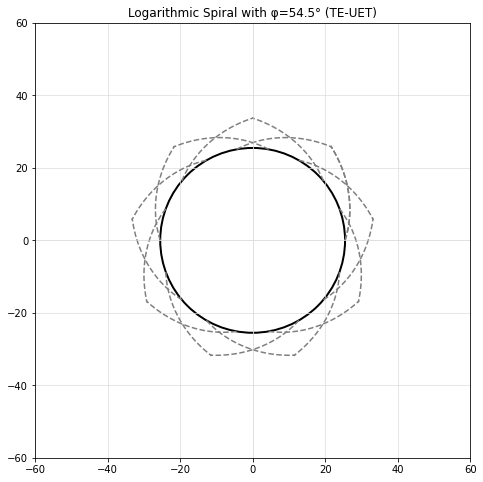

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
r = 25.5                                        # Base value for the spiral (tunnel radius)
phi_deg = 54.5                                  # Internal friction angle (phi) (in degrees)
stop_point = 0.28                               # (0.28 represents the code to stop at second intersection with the mirrorred one)
phi_rad = np.deg2rad(phi_deg)
t_vals = np.linspace(0, stop_point*np.pi, 100)  # Angle values from 0 to 2pi 

def plot_circle(r, ax):
    circle = plt.Circle((0, 0), r, color='k', fill=False, linestyle='-', linewidth=2)
    ax.add_artist(circle)
    
# Fix: 
# Define r custom cotangent function since numpy does not have one
def cot(x):
    return 1 / np.tan(x)

# Function to calculate logarithmic spiral
def log_spiral(r, phi):
    cot_value = cot(np.deg2rad(45 + phi / 2))   # Calculate cotangent in radians
    r_vals = r * np.exp(cot_value * t_vals)     # Calculate r based on the equation
    x_vals = r_vals * np.cos(t_vals)            # Convert polar to Cartesian (x)
    y_vals = r_vals * np.sin(t_vals)            # Convert polar to Cartesian (y)
    return x_vals, y_vals

# Function to rotate points by an angle phi
def rotate_points(x, y, phi):
    phi = np.deg2rad(phi)
    x_new = x * np.cos(phi) - y * np.sin(phi)
    y_new = x * np.sin(phi) + y * np.cos(phi)
    return x_new, y_new

# Function to mirror points along the y-axis
def mirror_points(x, y):
    return -x, y

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the original logarithmic spiral
x_vals, y_vals = log_spiral(r, phi_deg)
ax.plot(x_vals, y_vals, linestyle='--', label=f'Logarithmic Spiral, φ={phi_deg}°', color='C7')

plot_circle(r, ax)

# Rotate and mirror the curves
rotation_angles = [40, 80, 120, 160, 200, 240, 280, 320, 360 ]  # Example rotation angles           # 360/9 interval to give nine-point geometry
mirror_enabled = True  # Enable mirroring

for angle in rotation_angles:
    x_rot, y_rot = rotate_points(x_vals, y_vals, angle)
    ax.plot(x_rot, y_rot, linestyle='--', label=f'Rotated by {angle}°', color='C7')
    
    if mirror_enabled:
        x_mir, y_mir = mirror_points(x_rot, y_rot)
        ax.plot(x_mir, y_mir, linestyle='--', label=f'Mirrored & Rotated by {angle}°', color='C7')

# Formatting the plot
ax.set_aspect('equal')
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
ax.axhline(0, color='gainsboro', linewidth=0.5)
ax.axvline(0, color='gainsboro', linewidth=0.5)
ax.set_title(f"Logarithmic Spiral with φ={phi_deg}\u00B0 (TE-UET)")

# ax.legend()
plt.grid(True, color='gainsboro', linewidth=0.7)
plt.savefig('TE-UET.png', dpi=300, bbox_inches='tight')
plt.show()